# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

In [3]:
df=pd.read_csv('glass.csv')

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
X=df.iloc[:,:-1]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [8]:
y=df['Type']

In [9]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [10]:
xtrain,xvalid,ytrain,yvalid=train_test_split(X,y,test_size=.2,random_state=42)

In [11]:
accu=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,xtrain,ytrain,cv=3)
    accu.append(score.mean())

Text(0, 0.5, 'Error Rate')

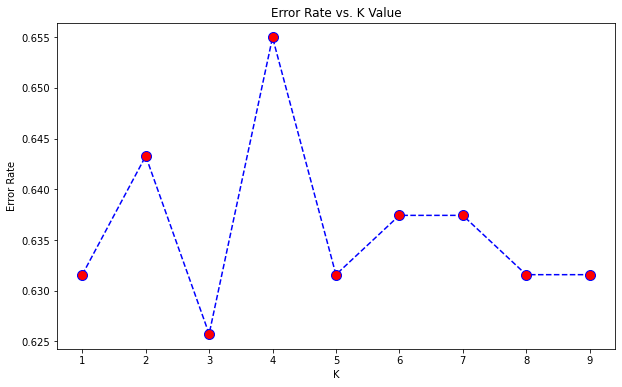

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),accu,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

__Taking 2 as the number of n_neighbors as there is more number of labels and less number of testing records.__

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)

In [42]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [43]:
y_pred=knn.predict(xvalid)

In [44]:
confusion_matrix(yvalid,y_pred)

array([[9, 1, 1, 0, 0, 0],
       [5, 9, 0, 0, 0, 0],
       [1, 0, 2, 0, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 1, 0, 0, 2, 0],
       [0, 0, 0, 0, 1, 7]], dtype=int64)

In [45]:
result=pd.DataFrame({'yvalid':yvalid,'y_pred':y_pred})
result.head()

,yvalid,y_pred
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2


In [46]:
print(result.yvalid.value_counts())
print(result.y_pred.value_counts())

2    14
1    11
7     8
5     4
6     3
3     3
Name: yvalid, dtype: int64
1    15
2    11
7     7
5     4
6     3
3     3
Name: y_pred, dtype: int64


In [47]:
print(classification_report(yvalid,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.82      0.69        11
           2       0.82      0.64      0.72        14
           3       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         4
           6       0.67      0.67      0.67         3
           7       1.00      0.88      0.93         8

    accuracy                           0.77        43
   macro avg       0.79      0.78      0.78        43
weighted avg       0.79      0.77      0.77        43

